In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
import datetime
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline
pd.set_option('display.max_columns', None)
sn.set_style('dark')

In [2]:
df = pd.read_excel('online_retail_II.xlsx')
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Customer ID'] = df['Customer ID'].astype(str)

In [6]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

In [7]:
df.describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


In [8]:
print('\nTotal jumlah data dengan nilai quantity < 1 adalah {} atau {:0.2%} dari total data\n'.format((len(df[df['Quantity']<1])),(len(df[df['Quantity']<1]))/525461))
print('Berikut contoh data nilai quantity yang < 1 ')
display(df[df['Quantity']<1].head())

print('\nTotal jumlah data dengan nilai price <= 0 adalah {} atau {:0.4%} dari total data\n'.format((len(df[df['Price']<=0])),(len(df[df['Price']<0]))/525461))
print('Berikut contoh data nilai quantity yang <= 0 ')
display(df[df['Price']<=0].head())



Total jumlah data dengan nilai quantity < 1 adalah 12326 atau 2.35% dari total data

Berikut contoh data nilai quantity yang < 1 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia



Total jumlah data dengan nilai price <= 0 adalah 3690 atau 0.0006% dari total data

Berikut contoh data nilai quantity yang <= 0 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,nan,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,nan,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,nan,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,nan,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,nan,United Kingdom


In [9]:
#mengambil data selain dari kondisi data diatas dan menempatkan pada dataframe baru

customer = df.loc[(df['Quantity']>0) & (df['Price']>0)]
customer.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
customer.describe()

,Quantity,Price
count,511566.000000,511566.000000
mean,11.400150,4.252563
std,86.761177,63.664629
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


In [11]:
#menambahkan kolom total_sales pada datafram dengan mengalikan nilai quantity dan price

customer['Total_Sales'] = customer['Quantity']*customer['Price']
customer.head()

<ipython-input-11-ee0192ef2ca3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Total_Sales'] = customer['Quantity']*customer['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [12]:
#menghitung Recency Frequency dan Monetary
#membuat referensi tanggal untuk analisa dengan mengambil tanggal terakhir + 1
ref_date = max(customer['InvoiceDate']) + datetime.timedelta(days=1)
print('\nTanggal referensi kita adalah: {}'.format(ref_date.date()))


Tanggal referensi kita adalah: 2010-12-10


In [13]:
#menambahkan kolom tanggal
customer['Day'] = customer['InvoiceDate'].dt.date
customer.head()

<ipython-input-13-7529e4e71d2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Day'] = customer['InvoiceDate'].dt.date


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [14]:
#Agregasi data per invoice
customer_inv_agg = customer.groupby(['Day','Invoice','Customer ID']).agg({'Total_Sales':'sum'})
customer_inv_agg = customer_inv_agg.reset_index()
customer_inv_agg

,Day,Invoice,Customer ID,Total_Sales
0,2009-12-01,489434,13085.0,505.30
1,2009-12-01,489435,13085.0,145.80
2,2009-12-01,489436,13078.0,630.33
3,2009-12-01,489437,15362.0,310.75
4,2009-12-01,489438,18102.0,2286.24
...,...,...,...,...
20947,2010-12-09,538167,14713.0,298.95
20948,2010-12-09,538168,14702.0,318.70
20949,2010-12-09,538169,13230.0,93.45
20950,2010-12-09,538170,13969.0,317.59


In [15]:
#Agregasi data per ID
customer_id_agg = customer_inv_agg.groupby(['Customer ID']).agg({'Day': lambda x: (ref_date.date() - x.max()).days,
                                                                'Invoice':'count',
                                                                'Total_Sales':'sum'})

customer_id_agg.rename(columns = {
    'Day':'Recency',
    'Invoice':'Frequency',
    'Total_Sales':'Monetary'
}, inplace=True)

In [16]:
customer_id_agg

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93
...,...,...,...
18284.0,67,1,461.68
18285.0,296,1,427.00
18286.0,112,2,1296.43


In [17]:
customer_id_agg.describe()

,Recency,Frequency,Monetary
count,4313.000000,4313.000000,4.313000e+03
mean,91.151635,4.857872,2.389582e+03
std,96.859957,27.646204,2.412426e+04
min,1.000000,1.000000,2.950000e+00
25%,18.000000,1.000000,3.080000e+02
50%,53.000000,2.000000,7.063900e+02
75%,136.000000,5.000000,1.723450e+03
max,374.000000,1739.000000,1.474262e+06


In [18]:
# Distribusi data

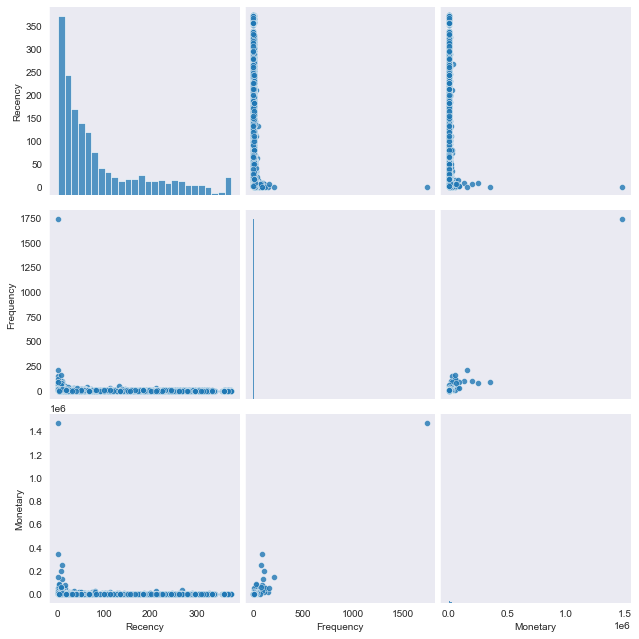

In [19]:
#Untuk melihat distribusi data disini menggunakan pairplot dari seaborn

sn.pairplot(customer_id_agg,plot_kws = {'alpha':0.8},height=3)

In [20]:
#dari plot diatas kita dapat adanya skew pada data kita maka diperlukan transformasi data dengan menggunakan log10. 
#Library yang digunakan adalah numpy

log_customer_id_agg = np.log10(customer_id_agg)
log_customer_id_agg

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,2.217484,1.041393,2.571546
12347.0,0.477121,0.301030,3.121665
12348.0,1.869232,0.000000,2.346666
12349.0,1.633468,0.477121,3.426697
12351.0,1.041393,0.000000,2.478465
...,...,...,...
18284.0,1.826075,0.000000,2.664341
18285.0,2.471292,0.000000,2.630428
18286.0,2.049218,0.301030,3.112749


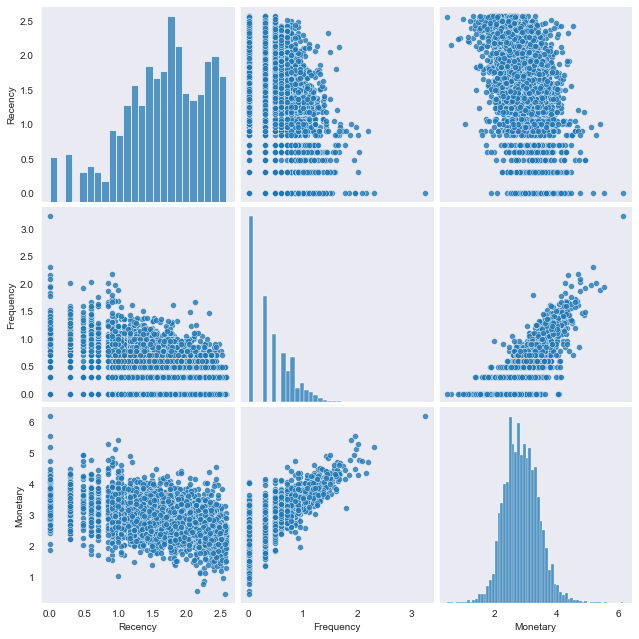

In [21]:
sn.pairplot(log_customer_id_agg,plot_kws = {'alpha':0.8},height=3)

In [22]:
std_scaler = StandardScaler()

std_scaler.fit(log_customer_id_agg)
std_customer = std_scaler.transform(log_customer_id_agg)

df_customer = pd.DataFrame(std_customer,index=log_customer_id_agg.index,columns=log_customer_id_agg.columns)

df_customer.rename(columns = {
    'Recency':'R_STD',
    'Frequency':'F_STD',
    'Monetary':'M_STD'
}, inplace=True)

df_customer.head()

,R_STD,F_STD,M_STD
Customer ID,,,
12346.0,0.942468,1.552309,-0.538049
12347.0,-1.938847,-0.315200,0.444911
12348.0,0.365908,-1.074526,-0.939867
12349.0,-0.024418,0.128977,0.989945
12351.0,-1.004649,-1.074526,-0.704366


In [23]:
df_customer.describe().round()

,R_STD,F_STD,M_STD
count,4313.0,4313.0,4313.0
mean,-0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-3.0,-1.0,-4.0
25%,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0
75%,1.0,1.0,1.0
max,2.0,7.0,6.0


<AxesSubplot:xlabel='R_STD', ylabel='Density'>

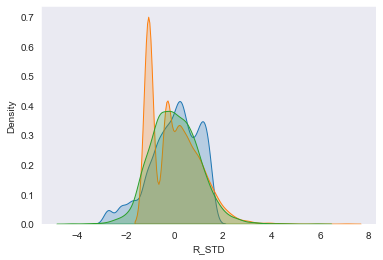

In [24]:
#visualisasi dari data yang telah di standarisasi menggunakan kdeplot

sn.kdeplot(df_customer['R_STD'], shade=True)
sn.kdeplot(df_customer['F_STD'], shade=True)
sn.kdeplot(df_customer['M_STD'], shade=True)

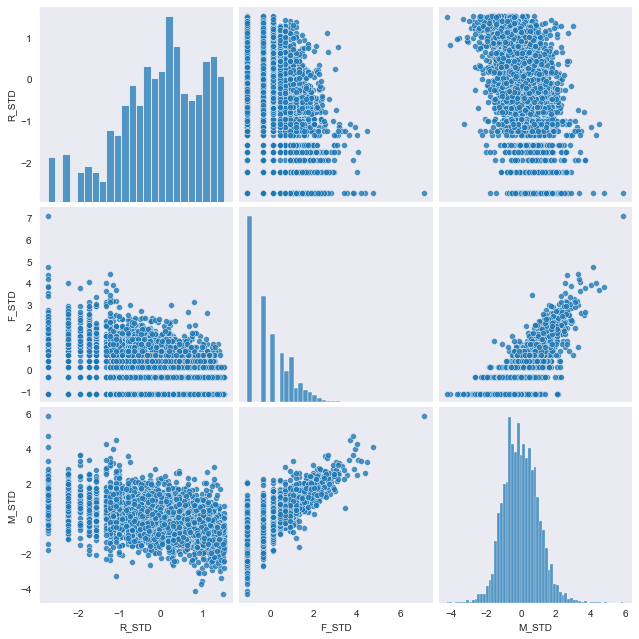

In [25]:
#membuat pairplot untuk melihat korelasi RFM

sn.pairplot(df_customer,plot_kws = {'alpha':0.8}, height=3)

In [26]:
#Build Model and Evaluation

In [30]:
#Build Elbow plot
sse = {} #jarak titik data ke center
kmeans = {} #untuk menyimpan model
labels = {} #untuk menyimpan label customer
central = {} #untuk menyimpan titik pusat dari cluster

for k in range(1, 16):
    kmeans[k] = KMeans(n_clusters=k, init='k-means++', random_state=99).fit(df_customer)
    
    sse[k] = kmeans[k].inertia_
    labels[k] = kmeans[k].labels_
    central[k] = kmeans[k].cluster_centers_

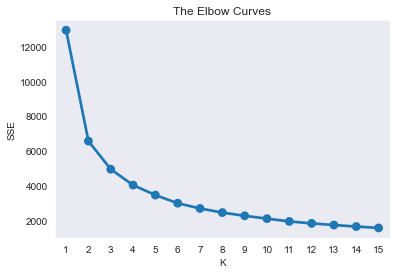

In [31]:
# Ploting elbow curves
plt.title('The Elbow Curves')
plt.xlabel('K')
plt.ylabel('SSE')

# Plotting SSE
sn.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [33]:
#Eksplorasi hasil clustering
#Menggabungkan hasil clustering k=4 ke dataset kita

df_customer_final = df_customer.assign(cluster = labels[4])
df_customer_final.head()

,R_STD,F_STD,M_STD,cluster
Customer ID,,,,
12346.0,0.942468,1.552309,-0.538049,1
12347.0,-1.938847,-0.315200,0.444911,3
12348.0,0.365908,-1.074526,-0.939867,2
12349.0,-0.024418,0.128977,0.989945,1
12351.0,-1.004649,-1.074526,-0.704366,3


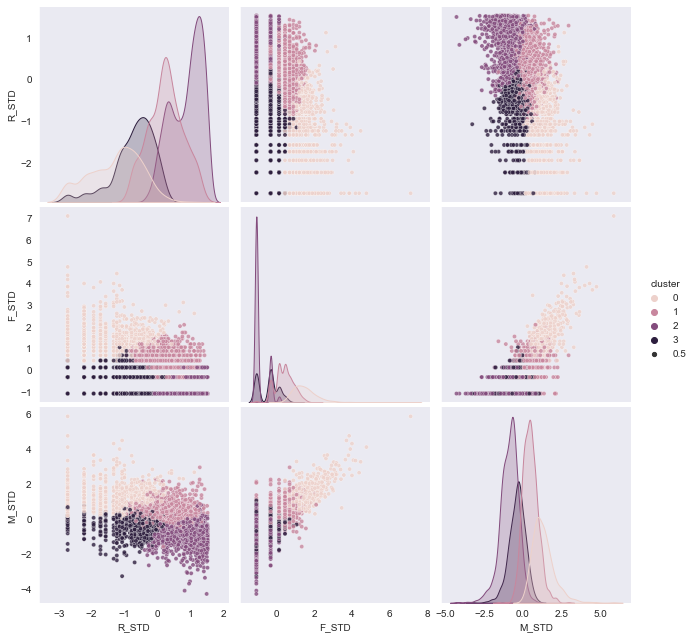

In [34]:
#visualisasi cluster dengan menggunakan pairplot

sn.distributions._has_statsmodels = False
sn.pairplot(df_customer_final, plot_kws = {'alpha': 0.8, 'size': 0.5}, height=3, hue='cluster')

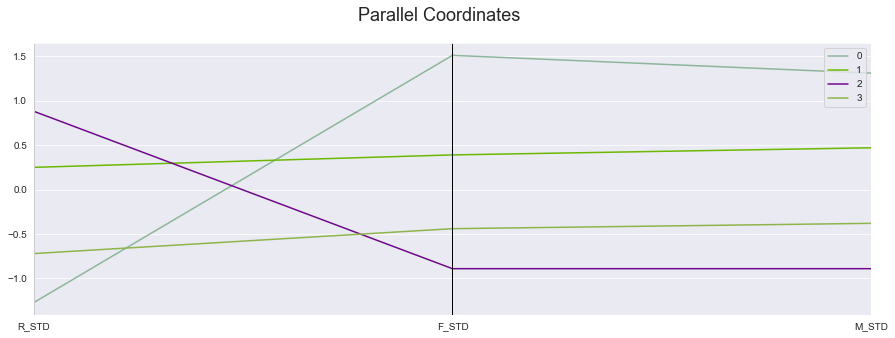

In [36]:
#Untuk mempermudah dalam meng interpretasi cluster yang terbentuk kita bisa membuat parallel coordinates plot untuk melihat
#bagaimana urutan nilai dari tiap cluster

sn.set_style('dark')
df_customer_final_plot = df_customer_final.groupby(['cluster']).mean().round(2)
df_customer_final_plot = df_customer_final_plot.reset_index()

fig = plt.figure(figsize=(15, 5))
title = fig.suptitle('Parallel Coordinates', fontsize=18)
pc = parallel_coordinates(df_customer_final_plot, 'cluster')


In [47]:
# Mengggabungkan dengan data asli
df_customer_final_join = df_customer_final.merge(customer_id_agg, how='inner', left_index=True, right_index=True)

df_customer_final_result = df_customer_final_join[['Recency', 'Frequency', 'Monetary', 'cluster']]
df_customer_final_result.head()

,Recency,Frequency,Monetary,cluster
Customer ID,,,,
12346.0,165,11,372.86,1
12347.0,3,2,1323.32,3
12348.0,74,1,222.16,2
12349.0,43,3,2671.14,1
12351.0,11,1,300.93,3


In [49]:
# Setelah data digabungkan kita bisa melihat analisa descriptive secara statistik dari tiap tiap cluster
df_customer_final_result_mean = df_customer_final_result.groupby(['cluster']).mean()
df_customer_final_result_mean

,Recency,Frequency,Monetary
cluster,,,
0,12.852437,15.916996,9444.317112
1,81.353171,4.219264,1738.924646
2,182.722883,1.248425,307.450757
3,21.678066,2.003538,563.767690


In [51]:
df_customer_cluster = df_customer_final_result.groupby(['cluster'])
customer_agg = df_customer_cluster.agg({
    'Recency': ['count', 'min', 'mean', 'median', 'max', 'std'],
    'Frequency': ['count', 'min', 'mean', 'median', 'max', 'std'],
    'Monetary': ['count', 'min', 'mean', 'median', 'max', 'std']
}).round(2)

customer_agg.T

cluster                    0         1        2        3
Recency   count       759.00   1277.00  1429.00   848.00
          min           1.00     11.00    26.00     1.00
          mean         12.85     81.35   182.72    21.68
          median        9.00     64.00   179.00    19.00
          max         212.00    374.00   374.00    63.00
          std          15.17     61.71   100.43    14.06
Frequency count       759.00   1277.00  1429.00   848.00
          min           3.00      1.00     1.00     1.00
          mean         15.92      4.22     1.25     2.00
          median        9.00      4.00     1.00     2.00
          max        1739.00     18.00     4.00     7.00
          std          64.68      1.99     0.49     0.96
Monetary  count       759.00   1277.00  1429.00   848.00
          min         690.30     97.40     2.95    10.95
          mean       9444.32   1738.92   307.45   563.77
          median     3473.80   1316.89   256.04   485.73
          max     1474262.32  34095.26  2300.40  2945.38
          std       56947.32   1718.63   234.68   378.04

In [54]:
df_customer_final_result['Segment'] = df_customer_final_result['cluster'].map({
    0.0: 'Loyalist',
    1.0: 'Churn',
    2.0: 'Loss',
    3.0: 'Potential'
})

df_customer_final_result['Score'] = df_customer_final_result['cluster'].map({
    0.0: 4,
    1.0: 2,
    2.0: 1,
    3.0: 3
})

df_customer_final_result.head(10)

<ipython-input-54-9697c9a6b67e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_final_result['Segment'] = df_customer_final_result['cluster'].map({
<ipython-input-54-9697c9a6b67e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_final_result['Score'] = df_customer_final_result['cluster'].map({


,Recency,Frequency,Monetary,cluster,Segment,Score
Customer ID,,,,,,
12346.0,165,11,372.86,1,Churn,2
12347.0,3,2,1323.32,3,Potential,3
12348.0,74,1,222.16,2,Loss,1
12349.0,43,3,2671.14,1,Churn,2
12351.0,11,1,300.93,3,Potential,3
12352.0,11,2,343.80,3,Potential,3
12353.0,44,1,317.76,2,Loss,1
12355.0,203,1,488.21,2,Loss,1
12356.0,16,3,3562.25,1,Churn,2


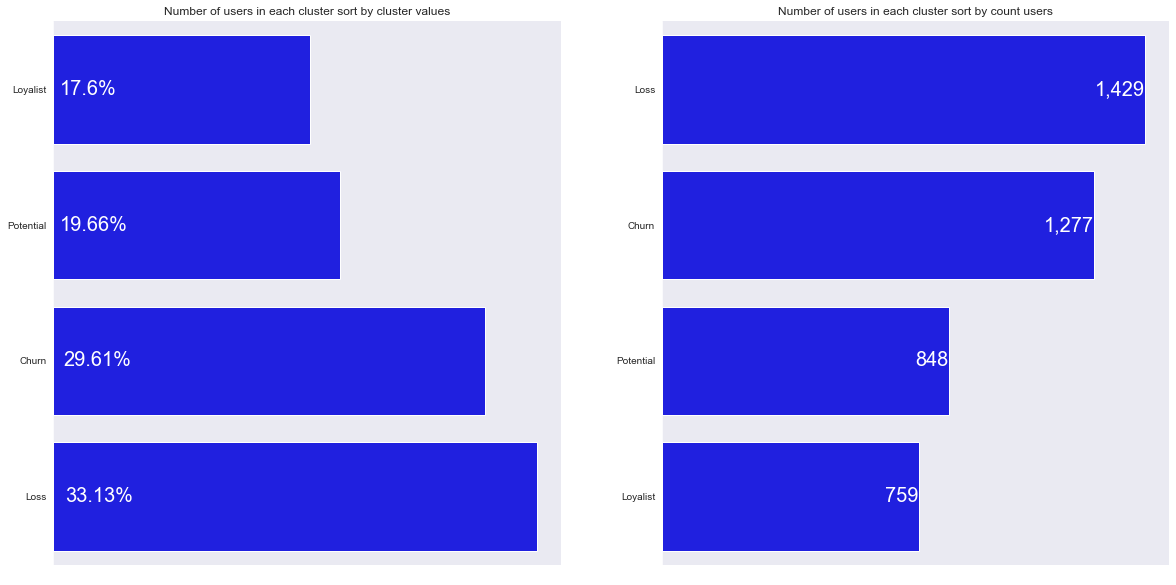

In [65]:
# Membuat plot untuk mengetahui distribusi customer pada masing masing segmen

fig, ax = plt.subplots(1, 2, figsize=(20,10))

g = sn.barplot(x = df_customer_final_result['Segment'].value_counts(),
                y = df_customer_final_result['Segment'].value_counts().index,
                order = ['Loyalist', 'Potential', 'Churn', 'Loss'],
                color = 'blue',
                ax = ax[0])

g = sn.barplot(x = df_customer_final_result['Segment'].value_counts(),
                y = df_customer_final_result['Segment'].value_counts().index,
                color = 'blue',
                ax = ax[1])

ax[0].set(title = 'Number of users in each cluster sort by cluster values',
          xlabel = ' ',
          xticks = ([])
         )

ax[1].set(title = 'Number of users in each cluster sort by count users',
          xlabel = ' ',
          xticks = ([])
         )

sn.despine(right=True, bottom=True, top=True)

#Add label
labels = df_customer_final_result['Segment'].value_counts().index

x_1 = df_customer_final_result['Segment'].value_counts(sort = False, normalize = True)*100
x_1 = x_1.reindex(['Loyalist', 'Potential', 'Churn', 'Loss'])
x_2 = df_customer_final_result['Segment'].value_counts()

for n, i in enumerate(labels):
    ax[0].text(x_1[n]-0.003,
              n,
              s=f'{round(x_1[n],2):,}%',
              va='center',
              ha='left',
              color='white',
              fontsize=20)
    
    ax[1].text(x_2[n]-0.1,
              n,
              s=f'{round(x_2[n],2):,}',
              va='center',
              ha='right',
              color='white',
              fontsize=20)

In [66]:
 df_customer_final_result.to_csv('customer_segmentation_result.csv', index=True)